# O4 genkendelse af manipulerede billeder, af ansigter

## Overvejser

### Datasættet
- Alle ansigter er centreret
- Mulighed for at fjerne detaljer i hjørner. Vi er meget specifikt intresseret i mund, næse & øjne
- G fold cross validation til at lave trænings og validerings sæt
- Alle billeder samme størrelse, derfor ikke brug for padding filter
- feature scaling (smid filter til at nedvurderer hjørner af billeder, da der sjælendt er ansigt i hjørnerne) #preproccesing

## Code and implementation

### Imports and frameworks
Here we import the necesarry libraries and frameworks which we will use in the generation of our machine learning model.

In [33]:
# Imports and other modules we use
import os # Directory and file reading
import re # Regex
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import Image as IImage
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# We should probably use keras since we want the make an CNN and possibly use our GPU
# import keras

### Constants and custom hyperparameters
Following are some of our custom hyperparameters which change some of the preprocessing changes we make to the data.

In [ ]:
apply_filter = True # Should we apply a darkening border filter to the images. Since the faces are mostly centered.
test_size = 0.25 # Amount of test data. Value is normalized eg. 0.25 = 25%

# Images are fetched from https://www.kaggle.com/ciplab/real-and-fake-face-detection

# !!!!!!!!!!!! make the paths relative from the notebook !!!!!!!!!!!!!!!
fake_dir = "C:/Projects/SWMAL/real_and_fake_face/training_fake" #Directory for fake images
real_dir = "C:/Projects/SWMAL/real_and_fake_face/training_real" #Directory for real images

### Generation of input array
This step fetches all images and loads them into the X array. All images are of the size 600x600 with RGB values from 0 to 255. This makes the images have the shape (600, 600, 3)


This array includes both the fake and the real images.

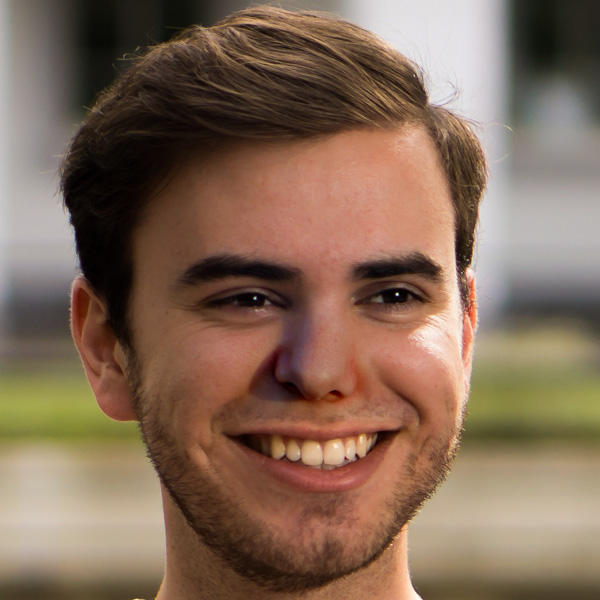

In [37]:
fake = os.listdir(fake_dir)
real = os.listdir(real_dir)

# Open images and insert into list
X = []  # We insert all images into the same list, as we use train_test_split and K-fold to split the data
for n in fake:
    X.append(Image.open(fake_dir + "/"+ n))

for n in real:
    X.append(Image.open(real_dir + "/"+ n))

# Show example image
IImage(filename= fake_dir + "/" + fake[1])

# Be sure that the images are in a correct format (The first param (2041) might be removed or changed depending on the specific dataset)
assert X.shape == (2041, 600, 600, 3)

### Generation of result array
Just as with the input array we generate an output array with the correct answers.
This includes which part of the image is edited. By default all real images will have [0,0,0,0] as the result otherwise the results adhear to the following syntax:

['left eye','right eye','nose','mouth']

All answers are in binary form. eg. [0,1,0,1] = Right eye and mouth changed

In [46]:
# Regex pattern for matching difficulty aswell as changed parts of the face
pattern = "(\w+)_(\d+)_(\d)(\d)(\d)(\d).jpg"

# Result array
y = []

# Array of difficulties
type_list = []

# Create results for fake images
dir_list = os.listdir(fake_dir)
for i in dir_list:
    acc = []
    
    result = re.match(pattern, i)
    left, right, nose, mouth = result.group(3, 4, 5, 6)

    acc.append(int(left))
    acc.append(int(right))
    acc.append(int(nose))
    acc.append(int(mouth))
    type_list.append(result.group(1))
    y.append(acc)

    
# Create result for real images
dir_list = os.listdir(real_dir)
for i in dir_list:
    acc = []    
    acc.append(0)
    acc.append(0)
    acc.append(0)
    acc.append(0)
    type_list.append("real")
    y.append(acc)

['easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy', 'easy',

### Preprocessing of all data

Since most of the faces are already centered we would like the turn down some of the features of the corners, which we already know doesnt include very much interesting data about if the photo is manipulated or not.

Therefore we apply a filter which darkens the edges of the images. This is done to all images (both real and fake).

In [ ]:
if apply_filter:
    # Create filter

    # Apply filter to all images

    # Results stay the same
    a = True # remove when actually code written

### Splitting the data into test and training data
First we want to randomly split the data into a training and a test set. This is done with train_test_split, where we use 25% of the data as test data.

After this we use K-fold with cross validation to try and get the most out of the remaining data.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

#generate the fold object
kf = KFold(n_splits=2)
# The kfold object will return the indices of the splits in the training set.


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 1, 1], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 0, 1, 0], [1, 1, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 0], [1, 1, 1, 1], [0, 0, 0, 0], [0, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 1, 1], [1, 0, 1, 1], [1, 0, 0, 0], [0, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0